In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

figure_path = '/home/weiss/git/thesis/doc/figures/'

In [2]:
def show_vis(type):
    dirs = next(os.walk('log/' + type))[1]
    dirs = ['log/' + type + '/' + d + '/' for d in dirs]

    for d in dirs:
        try:
            #print(glob( d + 'train*'))
            train_loss = pd.read_csv(glob( d + 'train*')[0])
            val_loss = pd.read_csv(glob( d + 'val*')[0])
            test_loss = pd.read_csv(glob( d + 'test*')[0])

            regex = r"log/" + re.escape(type) + r"/(.*)_.*"
            model_name = re.findall(regex, d)[0]

            plt.rcParams['font.size'] = 26
            plt.rcParams['axes.labelsize'] = 26
            plt.rcParams['xtick.labelsize'] = 26
            plt.rcParams['ytick.labelsize'] = 26
            plt.rcParams['legend.fontsize'] = 26
            plt.plot('iter', 'rmse', data=train_loss, label='train')
            plt.plot('iter', 'rmse', data=val_loss, label='val')
            plt.xlabel("epoch")
            plt.ylabel("RMSE")
            plt.legend()
            plt.style.use('seaborn-whitegrid')
            plt.ylim([0.2, 1.8])
            plt.savefig(figure_path + '/' + model_name + '-gcmc-' + type +'-loss.png', dpi=300, bbox_inches='tight')
            plt.show()
            print('Final RMSE:\n', model_name, test_loss[test_loss['rmse'] == test_loss['rmse'].min()])

        except Exception as e:
            print(e)

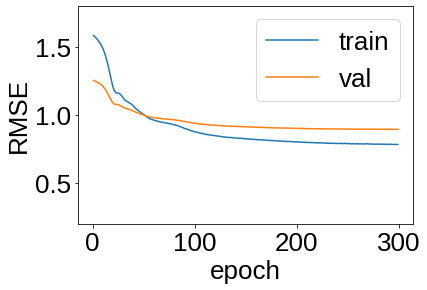

Final RMSE:
 ml-1m      iter   rmse
246   298  0.897
Final RMSE:
 ml-10m     iter    rmse
28    29  1.0698
Final RMSE:
 ml-100k      iter    rmse
194   295  0.9197


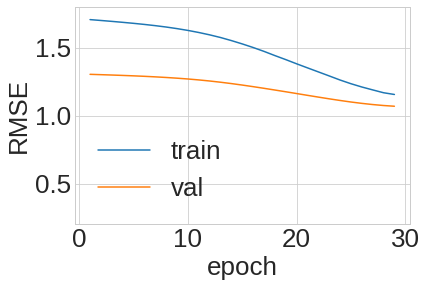

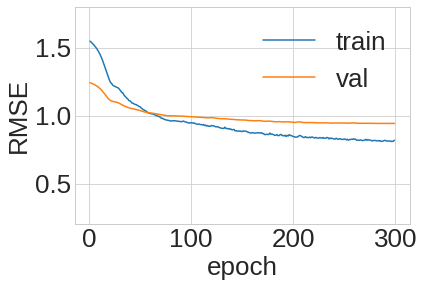

In [3]:
type='stack'
show_vis(type)

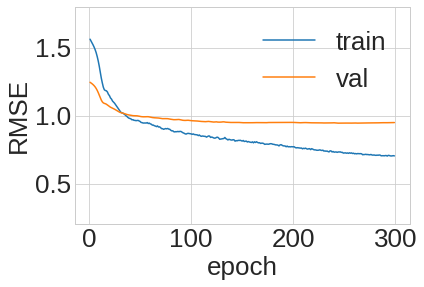

Final RMSE:
 ml-100k      iter    rmse
133   245  0.9138
Final RMSE:
 ml-1m      iter    rmse
192   299  0.8801
Final RMSE:
 ml-10m     iter   rmse
28    29  1.166


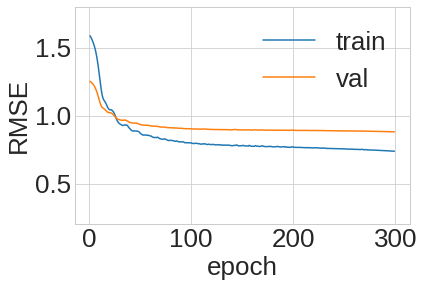

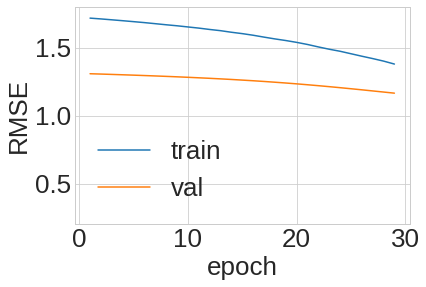

In [4]:
type='sum'
show_vis(type)

In [5]:
type='sample'
# special because epochs are represented as mini-batch epochs...show_vis(type)

    iter    rmse
0      1  0.8534
1      2  0.8442
2      3  0.8400
3      4  0.8381
4      5  0.8343
5      6  0.8352
6      7  0.8324
7      8  0.8291
8      9  0.8286
9     10  0.8275
10    11  0.8262
11    12  0.8253
12    13  0.8241
13    14  0.8221
14    16  0.8224
15    17  0.8215
16    18  0.8216
17    19  0.8210
18    20  0.8198
19    21  0.8198
20    22  0.8196
21    23  0.8183
22    24  0.8177
23    25  0.8185
24    26  0.8191
25    27  0.8188
26    28  0.8188
27    29  0.8182
28    30  0.8188
Final RMSE:
 ml-10m      iter    rmse
18  34387  0.8127
19  35950  0.8127


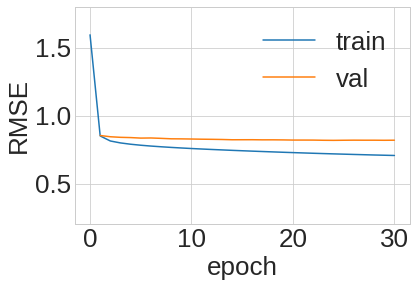

In [6]:
# ml-10m is special because epochs are represented per mini-batch...

# 10 mio * 0.6 (train ratio) / 4096 (bs) = 1464.84375

d = 'log/sample/ml-10m_YN/'

train_loss = pd.read_csv(glob( d + 'train*')[0])

train_loss = train_loss.iloc[::1465, :]
train_loss['iter'] = train_loss['iter'].apply(lambda x: x // 1465)
#print(train_loss)

val_loss = pd.read_csv(glob( d + 'val*')[0])
val_loss['iter'] = val_loss['iter'].apply(lambda x: x // 1465)
print(val_loss)

test_loss = pd.read_csv(glob( d + 'test*')[0])

regex = r"log/" + re.escape('sample') + r"/(.*)_.*"
model_name = re.findall(regex, d)[0]

plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26
plt.rcParams['legend.fontsize'] = 26
plt.plot('iter', 'rmse', data=train_loss, label='train')
plt.plot('iter', 'rmse', data=val_loss, label='val')
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.ylim([0.2, 1.8])
plt.savefig(figure_path + '/' + model_name + '-gcmc-' + type +'-loss.png', dpi=300, bbox_inches='tight')
plt.show()
print('Final RMSE:\n', model_name, test_loss[test_loss['rmse'] == test_loss['rmse'].min()])